In [1]:
# Importing required libraries

import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import os

In [2]:
# function to read file path or url

def read_file(path):
    '''
    path: dataset directory or url
    returns: PAndas DataFrame
    '''
    directory = path
    df = pd.read_excel(directory)
    return df

In [3]:
# Read file 

file_to_read = "ENB2012_data.xlsx"
df = read_file(file_to_read)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [5]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [6]:
# define functions to get labels and normalise input data

def get_labels(data):
    y1 = data['Y1'].copy()
    y1 = np.array(y1)
    y2 = data['Y2'].copy()
    y2 = np.array(y2)
    return y1, y2

def set_train_data(data):
    X = data.drop(columns=['Y1', 'Y2'])
    norm = StandardScaler()
    norm = norm.fit_transform(X)
    return norm
    

In [7]:
# Split Dataset and apply above functions to get labels and normalised data for the model

train_set, test_set = train_test_split(df, test_size=0.2, random_state=29)

train_y = get_labels(train_set)
test_y = get_labels(test_set)

train_x = set_train_data(train_set)
test_x = set_train_data(test_set)

In [8]:
# Get shape pf training and test data

train_x.shape, test_x.shape

((614, 8), (154, 8))

In [9]:
# Build Model using the keras functional API
# Defining a single input and two outputs

input_value = Input(shape=[8])

first_dense = Dense(units=128, activation=tf.nn.relu)(input_value)
second_dense = Dense(units=128, activation=tf.nn.relu)(first_dense)
output_1 = Dense(units=1, name='cooling')(second_dense)

third_dense = Dense(units=64, activation=tf.nn.relu)(second_dense)
output_2 = Dense(units=1, name='heating')(third_dense)

model_1= Model(inputs=input_value, outputs=[output_1, output_2])

model_1.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 128)          1152        input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 128)          16512       dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 64)           8256        dense_1[0][0]                    
______________________________________________________________________________________________

2022-01-29 14:49:38.316175: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
# Defining the model optimizer and compiling with loss function
# and evaluation metrics

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model_1.compile(optimizer=optimizer,
              loss=['mse', 'mse'],
              metrics=tf.keras.metrics.RootMeanSquaredError())

In [11]:
# Fit the data 
history = model_1.fit(train_x, train_y,
                    epochs=400, batch_size=30)

2022-01-29 14:49:53.704768: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/400
21/21 [==============================] - 1s 2ms/step - loss: 631.7737 - cooling_loss: 319.0279 - heating_loss: 312.7458 - cooling_root_mean_squared_error: 17.8614 - heating_root_mean_squared_error: 17.6846
Epoch 2/400
21/21 [==============================] - 0s 3ms/step - loss: 49.8637 - cooling_loss: 21.9617 - heating_loss: 27.9020 - cooling_root_mean_squared_error: 4.6863 - heating_root_mean_squared_error: 5.2822
Epoch 3/400
21/21 [==============================] - 0s 3ms/step - loss: 36.1515 - cooling_loss: 15.7050 - heating_loss: 20.4465 - cooling_root_mean_squared_error: 3.9630 - heating_root_mean_squared_error: 4.5218
Epoch 4/400
21/21 [==============================] - 0s 3ms/step - loss: 31.4008 - cooling_loss: 12.9659 - heating_loss: 18.4348 - cooling_root_mean_squared_error: 3.6008 - heating_root_mean_squared_error: 4.2936
Epoch 5/400
21/21 [==============================] - 0s 4ms/step - loss: 25.6258 - cooling_loss: 11.2418 - heating_loss: 14.3840 - cooling_root

In [12]:
y_pred = model_1.predict(test_x)

In [13]:
pd.DataFrame(history.history).columns

Index(['loss', 'cooling_loss', 'heating_loss',
       'cooling_root_mean_squared_error', 'heating_root_mean_squared_error'],
      dtype='object')

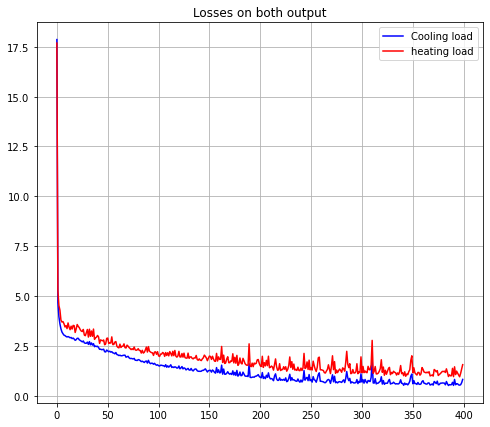

In [27]:
history_df = pd.DataFrame(history.history)
plt.figure(figsize=(8,7))
plt.plot(history_df['cooling_root_mean_squared_error'], color='blue', label='Cooling load')
plt.plot(history.history['heating_root_mean_squared_error'], color='red', label='heating load')
plt.title('Losses on both output')
plt.grid()
plt.legend()
plt.show()

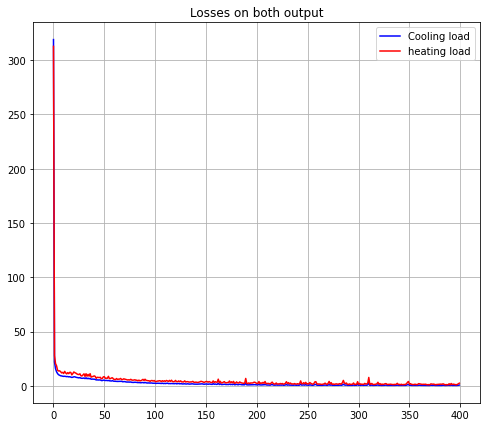

In [28]:
history_df = pd.DataFrame(history.history)
plt.figure(figsize=(8,7))
plt.plot(history_df['cooling_loss'], color='blue', label='Cooling load')
plt.plot(history.history['heating_loss'], color='red', label='heating load')
plt.title('Losses on both output')
plt.grid()
plt.legend()
plt.show()

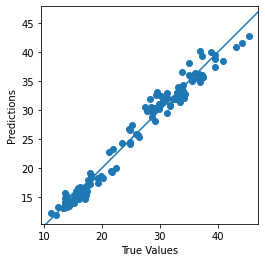

In [24]:
plt.scatter(test_y[1], y_pred[1])
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-100, 100], [-100, 100])

plt.show()

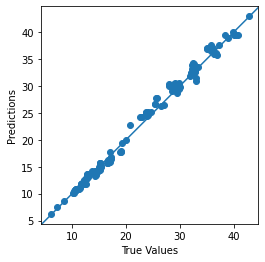

In [25]:
plt.scatter(test_y[0], y_pred[0])
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-100, 50], [-100, 50])

plt.show()